In [130]:
import pandas as pd
import os
import numpy as np
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [131]:
all_rain_gages_data =  '2020-03-27_2020-03-30GSSHA_rain_gages_rawfilled_NA.csv'
#read gage data
gages_data = pd.read_csv(all_rain_gages_data)

In [132]:
#files we care about for lower watershed....
print('HI-41')
print('HI-45')
print('USC00518165')
print('PRIH1')
print('USGS_uv221101159280801')

HI-41
HI-45
USC00518165
PRIH1
USGS_uv221101159280801


In [133]:
#files that could be used to fill gaps...
print('USC00514561')
print('HanaleiWEST_radar')
print('HanaleiEAST_radar')

USC00514561
HanaleiWEST_radar
HanaleiEAST_radar


In [134]:
GSSHA_gages = ['HI-41', 'HI-45', 'USC00518165', 'PRIH1', 'USGS_uv221101159280801', 'USC00514561', 'HanaleiWEST_radar', 'HanaleiEAST_radar']

In [135]:
GSSHA_rain_data = gages_data[GSSHA_gages]

# Determine which rain gauges have missing values

In [136]:
#get the names of gages from columns
gages_names = (GSSHA_rain_data.columns.tolist())[0:]
n = len(GSSHA_rain_data)
#Find out which columns have missing values... 
for i in range(0, len(gages_names)):
    name = gages_names[i]
    na_val = GSSHA_rain_data[name].isna().sum()
    print(name +' = '+ str(na_val) + ' NaN')
    
print('length of rain data: ' + str(n))

HI-41 = 0 NaN
HI-45 = 0 NaN
USC00518165 = 0 NaN
PRIH1 = 0 NaN
USGS_uv221101159280801 = 73 NaN
USC00514561 = 73 NaN
HanaleiWEST_radar = 0 NaN
HanaleiEAST_radar = 0 NaN
length of rain data: 73


# Plot all of the data

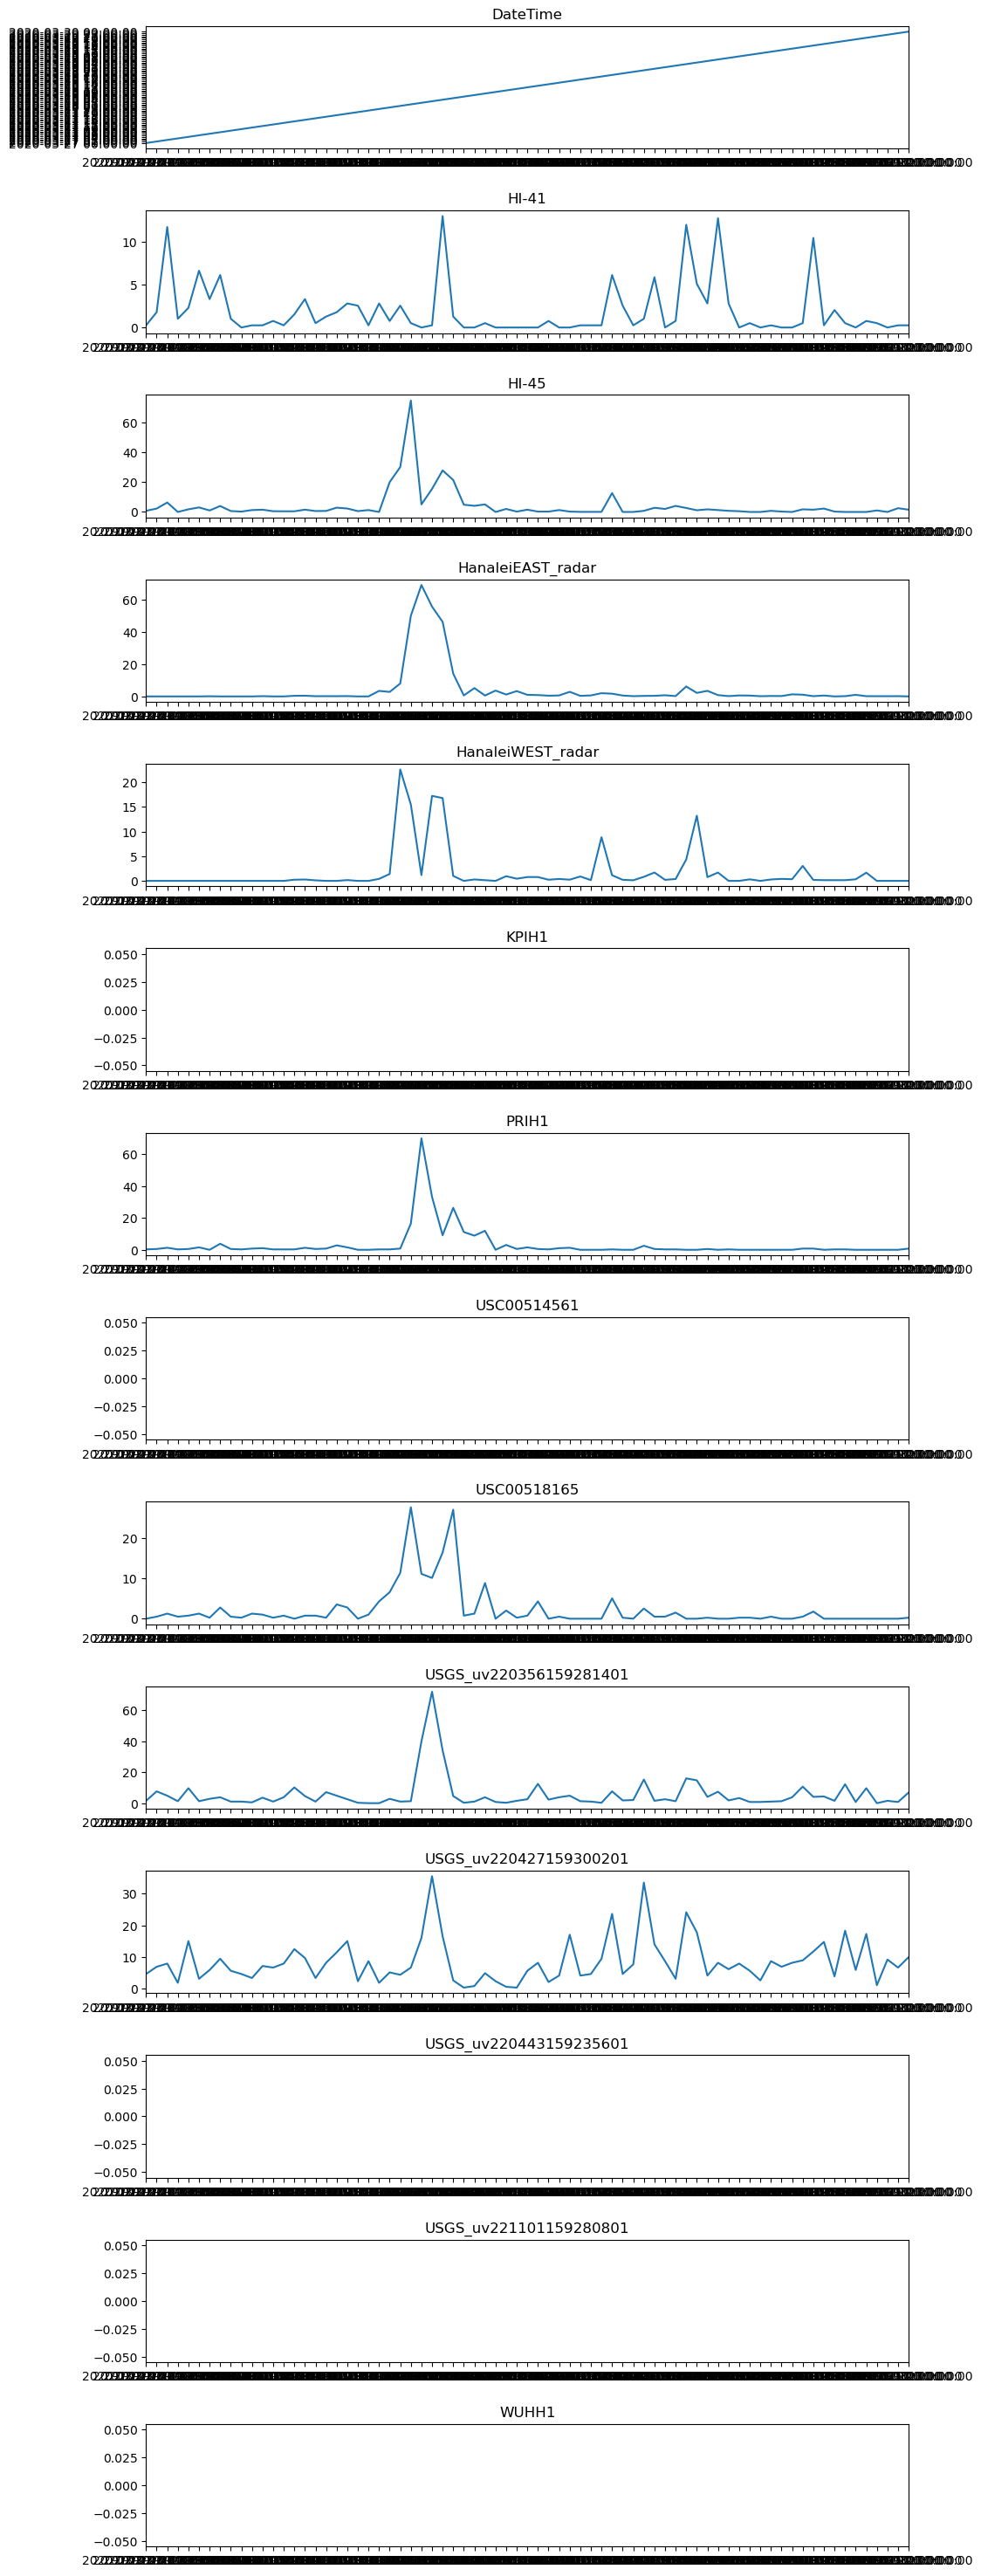

In [137]:
gages_names = (gages_data.columns.tolist())[2:]

fig, axs= plt.subplots(len(gages_names), figsize=(10,30))
fig.tight_layout(pad=3.0)

for i in range(0, len(gages_names)):
    axs[i].plot(gages_data['DateTime'], gages_data[gages_names[i]])
    axs[i].set_title(gages_names[i])
    axs[i].set_xlim((gages_data['DateTime'].min()), (gages_data['DateTime'].max()))

In [138]:
GSSHA_rain_data.to_csv('18ft_gages.csv')